In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from PIL import Image 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import sklearn as sk
from sklearn.model_selection import train_test_split
import pickle

print(tf.__version__)

2024-10-06 12:50:59.913223: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-06 12:51:00.012238: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-06 12:51:00.060892: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-06 12:51:00.073422: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-06 12:51:00.136415: I tensorflow/core/platform/cpu_feature_guar

2.17.0


In [2]:
gpus = tf.config.list_physical_devices('GPU')
gpuid = 0 #int(args.gpu_id)                                                                                                                           
if gpus:
  # Restrict TensorFlow to only allocate X GB of memory on the first GPU                                                                              
  try:
    tf.config.set_visible_devices(gpus[gpuid], 'GPU')
    tf.config.experimental.set_memory_growth(gpus[gpuid], True)
    '''
    tf.config.set_logical_device_configuration(
        gpus[gpuid],
        [tf.config.LogicalDeviceConfiguration(memory_limit=12000)])
    '''
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized                                                                                   
    print(e)

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1728240664.724945    3763 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728240664.805512    3763 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728240664.807465    3763 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728240664.811763    3763 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
samp7_images = []
path = 'sample_7/'
for f in os.listdir(path):
    intensity_image = np.float32( Image.open(path + f) )
    reshaped_intensity = np.mean(intensity_image, axis=-1) 
    image_array = np.expand_dims(reshaped_intensity, axis=-1)
    rescaled_array = image_array/255.0
    samp7_images.append(rescaled_array)

In [4]:
samp7_images = np.array(samp7_images)

In [32]:
reshaped_intensity.shape

(1024, 1024)

In [5]:
samp7_images[0].shape

(1024, 1024, 1)

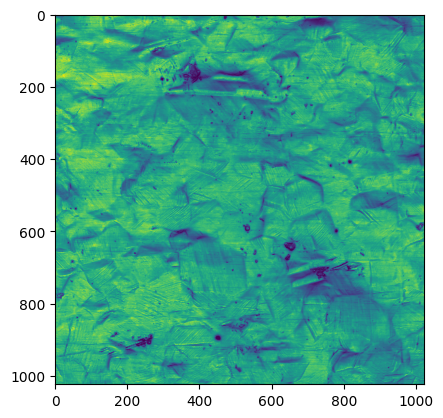

In [34]:
plt.imshow(reshaped_intensity)
plt.show()

In [6]:
from tensorflow.keras.models import load_model

best_model = load_model('checkpoint.model.keras')

In [9]:
preds = best_model.predict(samp7_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [10]:
preds2 = np.array(preds>=.5)

In [13]:
preds2.sum()

35

Text(0, 0.5, 'freq')

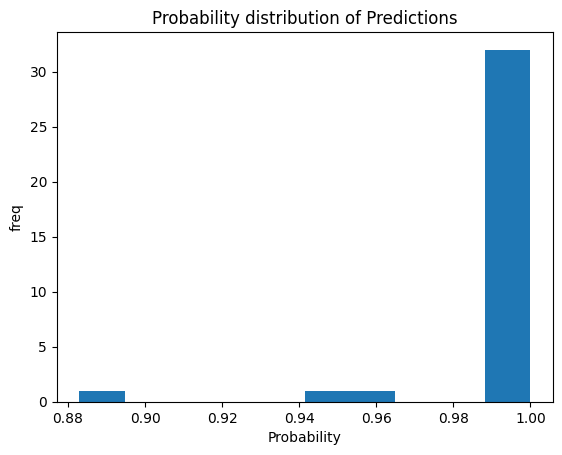

In [26]:
plt.hist(preds.flatten())
plt.title('Probability distribution of Predictions')
plt.xlabel('Probability')
plt.ylabel('freq')

In [14]:
samp1_images = []
path = 'sample_1/'
for f in os.listdir(path):
    intensity_image = np.float32( Image.open(path + f) )
    reshaped_intensity = np.mean(intensity_image, axis=-1) 
    image_array = np.expand_dims(reshaped_intensity, axis=-1)
    rescaled_array = image_array/255.0
    samp1_images.append(rescaled_array)

In [18]:
samp1_images = np.array(samp1_images)

In [23]:
samp1_images.shape

(22, 1024, 1024, 1)

In [19]:
probs_1 = best_model.predict(samp1_images)
preds_1 = np.array(probs_1>=.5)

E0000 00:00:1728243316.769342    3918 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1728243316.892840    3918 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [20]:
preds_1.sum()

15

In [24]:
preds_1

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True]])

Text(0, 0.5, 'freq')

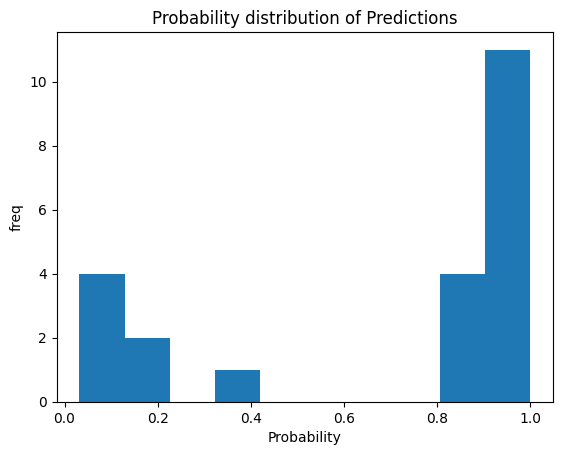

In [25]:
plt.hist(probs_1.flatten())
plt.title('Probability distribution of Predictions')
plt.xlabel('Probability')
plt.ylabel('freq')